# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [60]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [61]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [62]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/dinarakarkabayeva/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


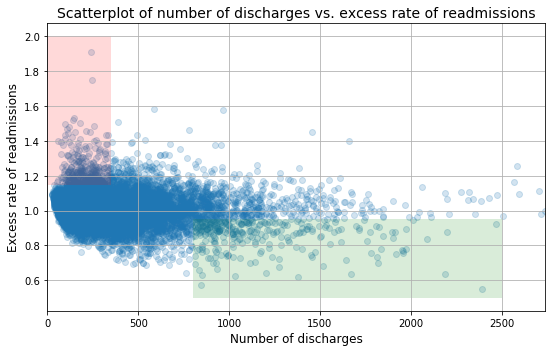

In [63]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
# DK: indexing [81:-3] does the following: '81' removes rows with zero readmissions, and '-3' removes outliers with discharges exceeding 3000 patients

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [64]:
clean_hospital_read_df.sort_values(by = 'Hospital Name').head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
963,ABBEVILLE GENERAL HOSPITAL,190034,LA,READM-30-HF-HRRP,206,NaN,1.1315,25.1,22.2,59.0,07/01/2010,06/30/2013
5336,ABBEVILLE GENERAL HOSPITAL,190034,LA,READM-30-COPD-HRRP,44,NaN,1.0198,21.7,21.2,11.0,07/01/2010,06/30/2013
4781,ABBEVILLE GENERAL HOSPITAL,190034,LA,READM-30-PN-HRRP,163,NaN,1.0284,18.0,17.5,31.0,07/01/2010,06/30/2013
12273,ABBOTT NORTHWESTERN HOSPITAL,240057,MN,READM-30-HF-HRRP,750,NaN,0.9043,19.8,21.9,143.0,07/01/2010,06/30/2013
3053,ABBOTT NORTHWESTERN HOSPITAL,240057,MN,READM-30-HIP-KNEE-HRRP,629,NaN,1.0601,5.2,4.9,34.0,07/01/2010,06/30/2013


# <font color = 'blue'> Answers to exercise </font>

## A.

### Questions about data: 
1. Is it a fair assumption that number of discharges indicate hospital size? What if some big hospitals have small number or discharges, and little hospitals have many (e.g. if they are located in larger metropolitan areas)?
2. Having smaller readmission rates does not necessarily mean a hospital does its job better: you cannot readmit patients who died in your care or shortly afterwards! Maybe having more detail on the types of readmissions, and also data on death rates would make a better basis for analyzing quality of care.

###  Thoughts on the above analysis:
1. Basing the analysis on the picture alone does not provide a very accurate estimation. The red and green rectangles are highlighting particular parts of the graph, ignoring the spread of the data for smaller hospitals where quite a few datapoints show excess rate of readmissions much lower than 1. And the same goes for the bigger hospitals having quite a few datapoints where excess rate of readmissions is above 1.

2. The analysis above treats each row in the dataset as a separate hospital. However, we can see from the snippet above that each row indicates readmission rates for a particular hospital _and 'Measure Name' combination_. The assumption we will make is that Measure Name corresponds to the diagnosis: 

    - 'READM-30-PN-HRRP': pneumonia
    - 'READM-30-AMI-HRRP': heart attack (based on this https://www.medicinenet.com/script/main/art.asp?articlekey=7489)
    - 'READM-30-HF-HRRP': heart failure
    - 'READM-30-HIP-KNEE-HRRP': hip/knee issues
    - etc.

   If we are looking at hospital by hospital rates of readmission, we need to group the data by hospital and look at aggregate numbers. That will also help us infer hospital sizes more accurately.

3. Without computing the correlation between hospital capacity (number of discharges) and readmission rates, or at least drawing a best fit line to show a downwards trend in this graph, making a statement on the correlation is unfounded. The scatterplot on its own is not enough, as the trend is not clear on it.

In conclusion, making recommendations based on the above analysis is premature.

## B. Null hypothesis: the number of discharges is not correlated with the excess readmission ratio.

In [67]:
clean_hospital_read_df.duplicated(subset = ['Provider Number', 'Measure Name']).sum()

0

In [68]:
relevant_diagnoses = clean_hospital_read_df[clean_hospital_read_df['Measure Name'].isin(['READM-30-PN-HRRP', 'READM-30-AMI-HRRP', 'READM-30-HF-HRRP'])]

In [69]:
by_provider_w_rel_diag = relevant_diagnoses[['Provider Number', 'Number of Discharges', 'Predicted Readmission Rate','Expected Readmission Rate']].groupby('Provider Number').sum()
by_provider_w_rel_diag.sort_values(by = 'Number of Discharges', inplace = True)
by_provider_w_rel_diag[30:45]

,Number of Discharges,Predicted Readmission Rate,Expected Readmission Rate
Provider Number,,,
490143,0,NaN,NaN
50257,0,NaN,NaN
290002,0,NaN,NaN
670062,0,NaN,NaN
490104,0,NaN,NaN
670069,0,NaN,NaN
230144,0,NaN,NaN
150177,0,NaN,NaN
150181,0,NaN,NaN


There are some outliers in the data: let's see what they are more closely.

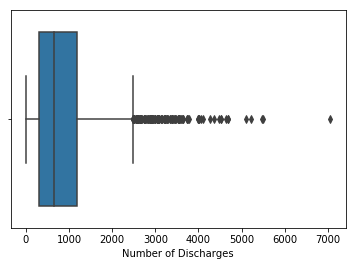

In [70]:
import seaborn as sns
sns.boxplot(by_provider_w_rel_diag['Number of Discharges'])

In [71]:
by_provider_w_rel_diag['Number of Discharges'].describe()

count    2951.000000
mean      867.162318
std       766.725409
min         0.000000
25%       312.000000
50%       650.000000
75%      1176.500000
max      7056.000000
Name: Number of Discharges, dtype: float64

In [72]:
print('The boundary of the upper outliers is ' + str((1176.5 - 312)*1.5 + 1176.5))

The boundary of the upper outliers is 2473.25


In [73]:
df_for_analysis = by_provider_w_rel_diag[(by_provider_w_rel_diag['Number of Discharges'] > 0) & (by_provider_w_rel_diag['Number of Discharges'] < 2474)]

In [74]:
df_for_analysis.head()

,Number of Discharges,Predicted Readmission Rate,Expected Readmission Rate
Provider Number,,,
50071,29,21.0,19.3
50140,34,20.7,19.4
670080,35,20.7,19.5
190133,37,23.6,22.3
50546,37,16.7,15.1


In [75]:
df_for_analysis.tail()

,Number of Discharges,Predicted Readmission Rate,Expected Readmission Rate
Provider Number,,,
310019,2467,65.7,57.4
420051,2467,57.4,57.3
100080,2467,61.0,57.0
100084,2472,64.6,60.7
450040,2473,54.8,58.4


In [76]:
df_for_analysis['Excess Readmission Ratio'] = df_for_analysis['Predicted Readmission Rate']/df_for_analysis['Expected Readmission Rate']
df_for_analysis.head()

/Users/dinarakarkabayeva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Number of Discharges,Predicted Readmission Rate,Expected Readmission Rate,Excess Readmission Ratio
Provider Number,,,,
50071,29,21.0,19.3,1.088083
50140,34,20.7,19.4,1.067010
670080,35,20.7,19.5,1.061538
190133,37,23.6,22.3,1.058296
50546,37,16.7,15.1,1.105960


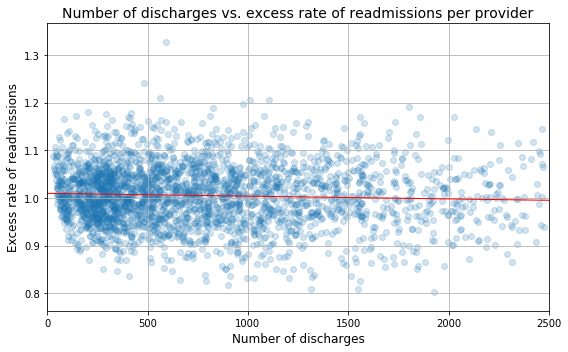

In [77]:
discharges = np.array(df_for_analysis['Number of Discharges'])
exc_readm_ratio = np.array(df_for_analysis['Excess Readmission Ratio'])

slope, intercept = np.polyfit(discharges, exc_readm_ratio, 1)
x1 = np.array([0,2500])


fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(discharges, exc_readm_ratio, alpha=0.2)

ax.plot(x1, slope*x1 + intercept,
                 linewidth=1, color ='red')

ax.set_xlim([0, 2500])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Number of discharges vs. excess rate of readmissions per provider', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [78]:
def pearsonr(a,b):
    return stats.pearsonr(a,b)[0]

r_obs = pearsonr(discharges, exc_readm_ratio)
r_obs

-0.051897470472998232

In [79]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # permute discharges
    discharges_permuted = np.random.permutation(discharges)

    # Compute Pearson correlation
    perm_replicates[i] = pearsonr(discharges_permuted, exc_readm_ratio)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0035


In [80]:
margin_of_error = 1.96 * stats.sem(perm_replicates)
print('margin of error = ', margin_of_error)

margin of error =  0.000371735422843


In [81]:
conf_interval = np.percentile(perm_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_interval)

95% confidence interval = [-0.03684223  0.03703928]


In [82]:
conf_interval = np.percentile(perm_replicates, [0.5, 99.5])
print('99% confidence interval =', conf_interval)

99% confidence interval = [-0.04925363  0.04938937]


**Statistics**
+ **p-value we obtained is .0023, which is less than the $\alpha$ of .01.** We can reject the null hypothesis and state that the number of discharges is correlated with the excess readmission ratio.
+ The correlation is -.05.

**Conclusion**
+ There is a statistically significant negative correlation between hospital capacity (number of discharges) and readmission rates, but the correlation is very small.


**Regulatory policy recommendation**
+ Based on this analysis, we cannot reliably recommend upgrades to any hospitals, or consolidation of hospitals and facilities into larger ones. 
+ Further analysis is required to make data-driven recommendations.

****